# CODECLAUSE DATA SCIENCE INTERSHIP PROGRAM



---


**AUTHOR - Nikhil Eshwar T**



**TASK 3 - Diabetic Retinopathy Detection**

In [ ]:
from tensorflow import lite
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random, os
import cv2
import shutil
import keras
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
%matplotlib inline
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelBinarizer
from imutils import paths
from sklearn.utils import shuffle
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_accuracy
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16
from keras import layers
import json


Accesing the Kaggle API

In [ ]:
#Open and read the JSON file
with open('kaggle (1).json', 'r') as json_file:
    data = json.load(json_file)

#Access specific values from the loaded JSON data
username = data['username']
key= data['key']

In [ ]:
os.environ['KAGGLE_USERNAME'] =username
os.environ['KAGGLE_KEY'] =key

Downloading the Dataset

In [ ]:
!kaggle datasets download -d sovitrath/diabetic-retinopathy-224x224-gaussian-filtered

100% 427M/427M [00:23<00:00, 19.8MB/s]
100% 427M/427M [00:23<00:00, 18.7MB/s]


In [ ]:
!unzip diabetic-retinopathy-224x224-gaussian-filtered.zip

Archive:  diabetic-retinopathy-224x224-gaussian-filtered.zip
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0024cdab0c1e.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/00cb6555d108.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0124dffecf29.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/01b3aed3ed4c.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0369f3efe69b.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/03e25101e8e8.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/04ac765f91a1.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/059bc89df7f4.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/05a5183c92d0.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0684311afdfc.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0

In [ ]:
df = pd.read_csv("train.csv")
diagnosis_binary = {
        0: 'No_DR',
        1: 'DR',
        2: 'DR',
        3: 'DR',
        4: 'DR'}

diagnosis_classes = {
    0: 'No_DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferate_DR',
}
df["binary"] = df["diagnosis"].map(diagnosis_binary.get)
df["type"] = df["diagnosis"].map(diagnosis_classes.get)

In [ ]:
df.head()

,id_code,diagnosis,binary,type
0,000c1434d8d7,2,DR,Moderate
1,001639a390f0,4,DR,Proliferate_DR
2,0024cdab0c1e,1,DR,Mild
3,002c21358ce6,0,No_DR,No_DR
4,005b95c28852,0,No_DR,No_DR


In [ ]:
df.shape

(3662, 4)

Checking Duplicate Values

In [ ]:
df.duplicated().sum()

0

Checking Null Values

In [ ]:
df.isnull().sum()

id_code      0
diagnosis    0
binary       0
type         0
dtype: int64

Count of DR and non DR images

<Axes: >

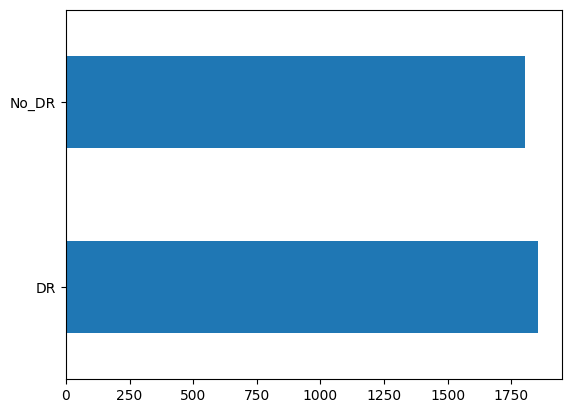

In [ ]:
df['binary'].value_counts().plot(kind='barh')

Count of each category of DR

<Axes: >

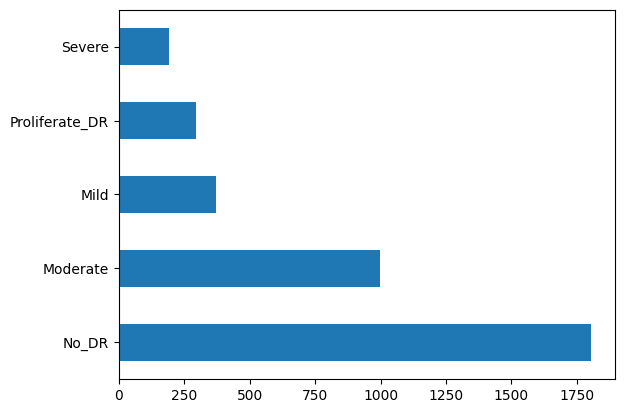

In [ ]:
df['type'].value_counts().plot(kind='barh')

In [ ]:
data = []
labels = []
width,height=224,224

imagePaths = list(paths.list_images('gaussian_filtered_images/gaussian_filtered_images'))

data = []
labels = []

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = load_img(imagePath, target_size=(width, height))
    image = img_to_array(image)
    data.append(image)
    labels.append(label)

data = np.array(data, dtype="float32")
labels = np.array(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)

data, labels = shuffle(data, labels)

print(data.shape)
print(labels.shape)

(3662, 224, 224, 3)
(3662, 5)


In [ ]:
data = data / 255.0

Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=.2)

print("Train images size:",x_train.shape)
print("Test images size:",x_test.shape)
print("Train label size:",y_train.shape)
print("Test label size:",y_test.shape)

Train images size: (2929, 224, 224, 3)
Test images size: (733, 224, 224, 3)
Train label size: (2929, 5)
Test label size: (733, 5)


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=.2)

print("Train images size:",x_train.shape)
print("Test images size:",x_val.shape)
print("Train label size:",y_train.shape)
print("Test label size:",y_val.shape)

Train images size: (2343, 224, 224, 3)
Test images size: (586, 224, 224, 3)
Train label size: (2343, 5)
Test label size: (586, 5)


VGG- 16 Model Creation

In [ ]:
Vgg16 = VGG16(include_top=False, input_shape= (224,224,3))
Vgg16.trainable=False

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
model = Sequential()
model.add(Vgg16)
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64 , activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(32 , activation="relu"))
#model.add(Dropout(0.25))
model.add(Dense(5 , activation="sigmoid"))

model.compile( optimizer="adam" , loss="binary_crossentropy" , metrics="binary_accuracy" )

Model Summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout (Dropout)           (None, 7, 7, 512)         0         
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 64)                1605696   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 5)                 1

Model Building

In [ ]:
callbacks = [EarlyStopping(monitor='val_binary_accuracy' , patience=10 , restore_best_weights=True)]

history = model.fit(x_train , y_train , epochs=50 , batch_size=64,
                    validation_data=(x_val,y_val), verbose=1 , callbacks = callbacks)

Epoch 1/50
37/37 [==============================] - 40s 603ms/step - loss: 0.3651 - binary_accuracy: 0.8597 - val_loss: 0.2619 - val_binary_accuracy: 0.8942
Epoch 2/50
37/37 [==============================] - 17s 469ms/step - loss: 0.2783 - binary_accuracy: 0.8890 - val_loss: 0.2595 - val_binary_accuracy: 0.8949
Epoch 3/50
37/37 [==============================] - 18s 477ms/step - loss: 0.2706 - binary_accuracy: 0.8911 - val_loss: 0.2474 - val_binary_accuracy: 0.8990
Epoch 4/50
37/37 [==============================] - 15s 395ms/step - loss: 0.2587 - binary_accuracy: 0.8903 - val_loss: 0.2486 - val_binary_accuracy: 0.8966
Epoch 5/50
37/37 [==============================] - 17s 464ms/step - loss: 0.2592 - binary_accuracy: 0.8922 - val_loss: 0.2416 - val_binary_accuracy: 0.9048
Epoch 6/50
37/37 [==============================] - 14s 390ms/step - loss: 0.2515 - binary_accuracy: 0.8944 - val_loss: 0.2392 - val_binary_accuracy: 0.9034
Epoch 7/50
37/37 [==============================] - 15s 39

Graph for plotting the accuracy and loss

In [ ]:
def plot_curve(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["binary_accuracy"]
  val_accuracy = history.history["val_binary_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

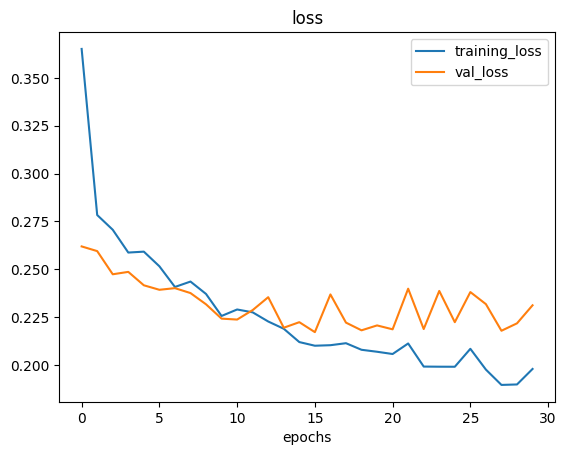

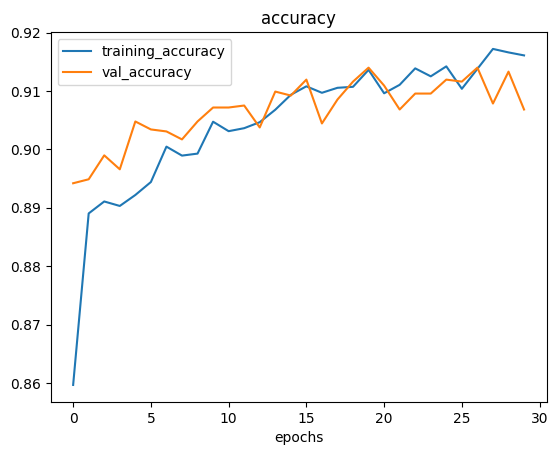

In [ ]:
plot_curve(history)

In [ ]:
score = model.evaluate(x_test,y_test)

23/23 [==============================] - 12s 339ms/step - loss: 0.2406 - binary_accuracy: 0.9031


In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

23/23 [==============================] - 3s 131ms/step


Testing with one of the sample test data

[1 0 0 0 0]
Prediction: Mild


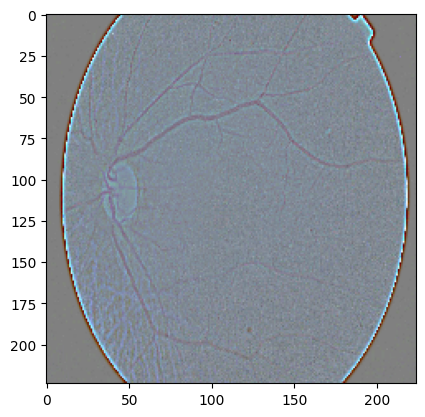

In [ ]:
index =5
predictions=["Mild","Moderate","NO_DR","Proliferate_DR","Severe"]

img = x_test[index]
RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
RGBImg= cv2.resize(RGBImg,(224,224))

plt.imshow(RGBImg)
print(y_test[index]) # true
print(f"Prediction: {predictions[pred[index]]}")

Saving the Model

In [ ]:
model.save('diabretino.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Testing the Model with Custom Input

In [ ]:
import cv2
predictions=["Mild","Moderate","NO_DR","Proliferate_DR","Severe"]
def predict_new(path):
    img = cv2.imread(path)

    RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    RGBImg= cv2.resize(RGBImg,(224,224))
    plt.imshow(RGBImg)
    image = np.array(RGBImg) / 255.0

    predict=model.predict(np.array([image]))
    pred=np.argmax(predict,axis=1)

    print(f"Predicted: {predictions[pred[0]]}")

1/1 [==============================] - 0s 154ms/step
Predicted: Moderate


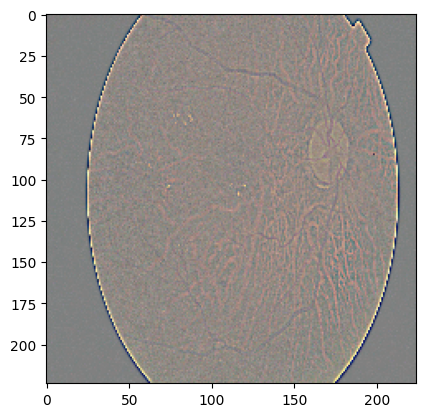

In [ ]:
predict_new('ModerateDR.png')